In [ ]:
!python --version
!pip --version

Python 3.9.16
pip 23.0.1 from E:\Conda\envs\env2\lib\site-packages\pip (python 3.9)



In [ ]:
!pip install numpy
!pip install scipy
!pip install scikit-learn
!pip install pandas

!pip install tensorflow

# **Library Imports**

In [ ]:
import numpy as np
import pandas as pd
import re, string
import matplotlib.pyplot as plt
from tensorflow import keras 
import tensorflow as tf
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.ticker as ticker
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers

# **Exploratory Data Analysis**

In [ ]:
df = pd.read_csv ('IMDB Dataset.csv')
df.head (5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
#Exploraing the data
print( 'The shape of the dataset: ', df.shape )

print( '\nDataset description:\n {}'.format( df.describe () ) )
print( '\nSentiment unique values count:\r\n {}\n'.format( df ['sentiment'].value_counts() ) )

print( df.isnull().sum() )
print('\nno of rows with null values in sentiment column: ', df['sentiment'].isnull().sum())
print('no of rows with null values in reviews column: ', df['review'].isnull().sum())

The shape of the dataset:  (50000, 2)

Dataset description:
                                                    review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

Sentiment unique values count:
 positive    25000
negative    25000
Name: sentiment, dtype: int64

review       0
sentiment    0
dtype: int64

no of rows with null values in sentiment column:  0
no of rows with null values in reviews column:  0


In [ ]:
# plt.title("IMDB Scores Distribution") #setting the title of the plot
# plt.xlabel('IMDB score') # setting the x label of the plot
# plt.ylabel('Frequency') # setting the y label of the plot
# plt.hist(df['sentiment'], color="skyblue", edgecolor='black'); # plotting the points on the histogram

## **Pie-chart to view data distribution**

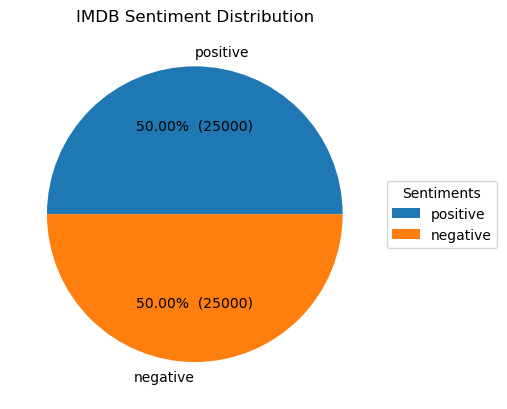

In [ ]:
#Pie chart to plot how the positive and negative sentiments are distributed
plt.title("IMDB Sentiment Distribution")

plt.pie ( df['sentiment'].value_counts(), labels = df['sentiment'].unique().tolist(),   
         autopct = lambda p : '{:.2f}%  ({:.0f})'.format( p, p * sum(df ['sentiment'].value_counts()) / 100 ) )

# Adding legend
plt.legend (title ="Sentiments", loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))

plt.show() 

## **Data Cleaning and Labeling**

In [ ]:
# removing special chars
def clean_review():
    clean = re.compile('<.*?>')

    df['review'] = df['review'].apply(lambda x: x.lower())
    df['review'] = df['review'].apply((lambda x: re.sub(clean, ' ', x)))
    df['review'] = df['review'].apply((lambda x: re.sub('\.+', ' ', x)))
    df['review'] = df['review'].apply((lambda x: re.sub('[^a-zA-z0-9\s]', '', x)))

clean_review()


# for sentiment labeling as 0 (positive) or 1 (negative)
label = {
    'positive': 0,
    'negative': 1,
}

df ['sentiment_label'] = df ['sentiment'].apply( lambda x : label [x] )

df.head()

,review,sentiment,sentiment_label
0,one of the other reviewers has mentioned that ...,positive,0
1,a wonderful little production the filming t...,positive,0
2,i thought this was a wonderful way to spend ti...,positive,0
3,basically theres a family where a little boy j...,negative,1
4,petter matteis love in the time of money is a ...,positive,0


## **Data Preprocessng by removing Stopwords and lemmatization**

In [ ]:

# removing the stopwords

nltk.download('stopwords')

stop_words = nltk.corpus.stopwords.words('english')

print( '\n{}\n'.format( stop_words ) )

df['cleaned_stwds'] = df['review'].apply( lambda x: " ".join (word for word in x.split() if word not in stop_words) )

# pd.Series( " ".join( df['cleaned_stwds'] ).split() ).value_counts()[:20]


#lemmatization

nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = nltk.stem.WordNetLemmatizer()

df['lemmatizer'] = df['cleaned_stwds'].apply( lambda x: [ lemmatizer.lemmatize(word) for word in x.split() ] )
df['review_processed'] = df['lemmatizer'].apply( lambda x: " ".join (x) )

df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,review,sentiment,sentiment_label,cleaned_stwds,lemmatizer,review_processed
0,one of the other reviewers has mentioned that ...,positive,0,one reviewers mentioned watching 1 oz episode ...,"[one, reviewer, mentioned, watching, 1, oz, ep...",one reviewer mentioned watching 1 oz episode y...
1,a wonderful little production the filming t...,positive,0,wonderful little production filming technique ...,"[wonderful, little, production, filming, techn...",wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,positive,0,thought wonderful way spend time hot summer we...,"[thought, wonderful, way, spend, time, hot, su...",thought wonderful way spend time hot summer we...
3,basically theres a family where a little boy j...,negative,1,basically theres family little boy jake thinks...,"[basically, there, family, little, boy, jake, ...",basically there family little boy jake think t...
4,petter matteis love in the time of money is a ...,positive,0,petter matteis love time money visually stunni...,"[petter, matteis, love, time, money, visually,...",petter matteis love time money visually stunni...


# **Train-Test split**

In [ ]:
#Train-test split
x = df['review_processed']
y = df['sentiment_label']

x_train, x_test, y_train, y_test = train_test_split (x, y, random_state = 42, test_size = 0.20, shuffle=True, stratify=y)

# print('..........', len(y) )

print ( "Training Data size: x_train {}  y_train {}".format( x_train.shape, y_train.shape ), ' - {}%'.format( ( len(x_train) / len(y) ) * 100 ) )
print ( "Testing Data size: x_test {}  y_test {}".format( x_test.shape, y_test.shape ), ' - {}%\n'.format( ( len(x_test) / len(y) ) * 100 ) )

print( 'y_train unique values counts:\n{}\n'.format( y_train.value_counts() ) )
print( 'y_test unique values counts:\n{}\n'.format( y_test.value_counts() ) )

print(x_train[1])
print(y_train[1])

Training Data size: x_train (40000,)  y_train (40000,)  - 80.0%
Testing Data size: x_test (10000,)  y_test (10000,)  - 20.0%

y_train unique values counts:
1    20000
0    20000
Name: sentiment_label, dtype: int64

y_test unique values counts:
0    5000
1    5000
Name: sentiment_label, dtype: int64

wonderful little production filming technique unassuming oldtimebbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwells mural decorating every surface terribly well done
0


## **Question1: Building a classifier (Logistic Regression and Naive Bayes)**

### **TF-IDF vectorization**

In [ ]:
# Tfidf vectorizer for TF-IDF
tvectorizer = TfidfVectorizer()

# print("\nLength of features in x_train: ", len(tvectorizer.get_feature_names_out()))

# transformed train reviews
tv_train_transformed = tvectorizer.fit_transform(x_train)
tv_test_transformed = tvectorizer.transform(x_test)

print('\nTF-IDF transformed Training data shape: {}\n'.format(tv_train_transformed.shape))    


TF-IDF transformed Training data shape: (40000, 125909)



In [ ]:
# Accuracy score and classification report func
def accuracy_classificationrep( model, y_test, y_pred, show_pred ):
    
    if (show_pred):
        print('\n{} prediction for test data: {}\n'.format(model, y_pred))

    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict = True)

    target_names = ['0 (positive)', '1 (negative)']

    print("\n{} accuracy score : {}".format(model, score))
    print( "\n{} classification report :\n{}\n".format( model, classification_report(y_test, y_pred, 
                                                                                     target_names = target_names ) ) )

    return report

### **Logistic Regression and Naive Bayes for Analysis**

In [ ]:

# using Logistic Regression
model_name = "Logistic Regression (TF-IDF Vectorizer)"

lrmodel = LogisticRegression()

# Fitting the model
lrmodel.fit( tv_train_transformed, y_train )

# Predicting test review
lr_predict = lrmodel.predict(tv_test_transformed)

#Classification report and accuracy score

lr_report = accuracy_classificationrep( model_name, y_test, lr_predict, True )
# print( lr_report )



# using Naive Bayes (MultinomialNB)
model_name = "Multinomial Naive bayes (TF-IDF Vectorizer)"

nbmodel = MultinomialNB()

# Fitting the model
nbmodel.fit( tv_train_transformed, y_train )

# Predicting test review
nb_predict = nbmodel.predict( tv_test_transformed )

#Classification report and accuracy score
nb_report = accuracy_classificationrep(model_name, y_test, nb_predict, True)
# print( nb_report )



Logistic Regression (TF-IDF Vectorizer) prediction for test data: [0 1 1 ... 0 1 0]


Logistic Regression (TF-IDF Vectorizer) accuracy score : 0.8967

Logistic Regression (TF-IDF Vectorizer) classification report :
              precision    recall  f1-score   support

0 (positive)       0.89      0.91      0.90      5000
1 (negative)       0.91      0.89      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Multinomial Naive bayes (TF-IDF Vectorizer) prediction for test data: [0 1 1 ... 0 1 0]


Multinomial Naive bayes (TF-IDF Vectorizer) accuracy score : 0.8676

Multinomial Naive bayes (TF-IDF Vectorizer) classification report :
              precision    recall  f1-score   support

0 (positive)       0.88      0.85      0.87      5000
1 (negative)       0.86      0.88      0.87      5000

    accuracy                           0.87     10000
   macro a

In [ ]:
# Confusion Matrix func
def confusionMatrix(s, y_test, predict):

    cm = confusion_matrix( y_test, predict)
    crosstab = pd.crosstab(y_test, predict, rownames = ['Actual'], colnames =['Predicted'], margins = True)

    print("\n{} confusion matrix :\n {}".format(s, crosstab))

    return cm


# Plot Heat-map func
def plot_heat_map(s, cm, cmap):
    
    class_names = ['positive', 'negative']

    fig, ax = plot_confusion_matrix( conf_mat = cm, figsize = (5, 5), colorbar = True, show_absolute = True, 
                                show_normed = True, cmap = cmap, class_names=class_names )

    plt.ylabel("Predicted sentiment for {}\n".format(s), fontsize = 10)
    plt.xlabel("True sentiment for {}".format(s), fontsize = 10)
    plt.title("\nHeat-map of confusion matrix Predicted sentiment \nversus True sentiment for {}".format(s), fontsize = 10)

    plt.show()


### **Confusion Matrics for LR and NB**

In [ ]:
cm_lr = confusionMatrix("Logistic Regression", y_test, lr_predict)

cm_nb = confusionMatrix("Naive Bayes", y_test, nb_predict)


Logistic Regression confusion matrix :
 Predicted     0     1    All
Actual                      
0          4538   462   5000
1           571  4429   5000
All        5109  4891  10000

Naive Bayes confusion matrix :
 Predicted     0     1    All
Actual                      
0          4265   735   5000
1           589  4411   5000
All        4854  5146  10000


### **Heatmap for LR and NB**

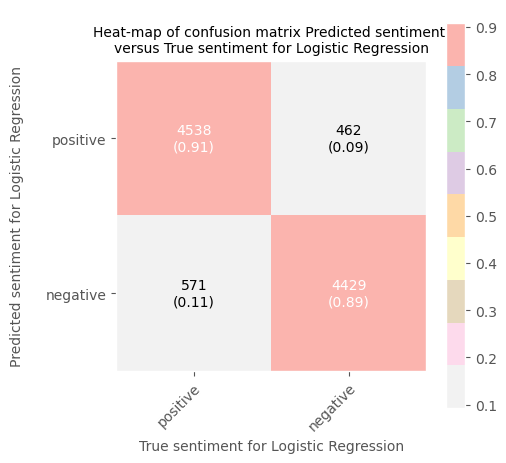

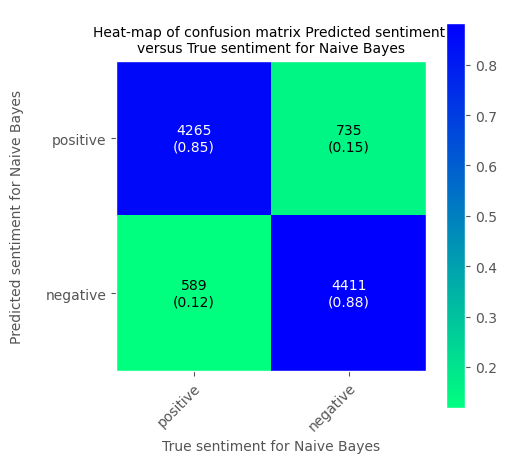

In [ ]:
plot_heat_map("Logistic Regression", cm_lr, plt.cm.Pastel1_r)

plot_heat_map("Naive Bayes", cm_nb, plt.cm.winter_r)

In [ ]:
# # Plot Bar Graph of true test values vrs predicted values in graph
# model_names = ['Logistic Regression', 'Naive Bayes']
# accuracy_scores = [lr_report['macro avg']['f1-score'], nb_report['macro avg']['f1-score']]
  
# fig = plt.figure(figsize = (6, 6))
 
# # creating the bar plot
# plt.bar(model_names, accuracy_scores, color='teal', edgecolor='black', width = 0.2, zorder = 3)
# plt.yticks( np.arange( 0.0, max(accuracy_scores) + 0.1, 0.1 ) )
 
# plt.xlabel("Algorithms")
# plt.ylabel("F1-scores")
# plt.title("Bar graph comparing the f1-scores of sentiment classification", fontweight ='bold')

# plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5, zorder = 0, axis = 'y')
# plt.show()

In [ ]:
model_names = ['Logistic Regression', 'Naive Bayes']

colors = ['rosybrown', 'lightsteelblue', 'indianred', 'lightseagreen', 'salmon', 'cornflowerblue']

positive_scores = {
                    'f1-score': [lr_report['0']['f1-score'], nb_report['0']['f1-score']], 
                    'precision': [lr_report['0']['precision'], nb_report['0']['precision']],
                    'recall': [lr_report['0']['recall'], nb_report['0']['recall']]
                    }
negative_scores = {
                    'f1-score': [lr_report['1']['f1-score'], nb_report['1']['f1-score']], 
                    'precision': [lr_report['1']['precision'], nb_report['1']['precision']],
                    'recall': [lr_report['1']['recall'], nb_report['1']['recall']]
                    }

### **Bar-graphs comparing LR and NB**

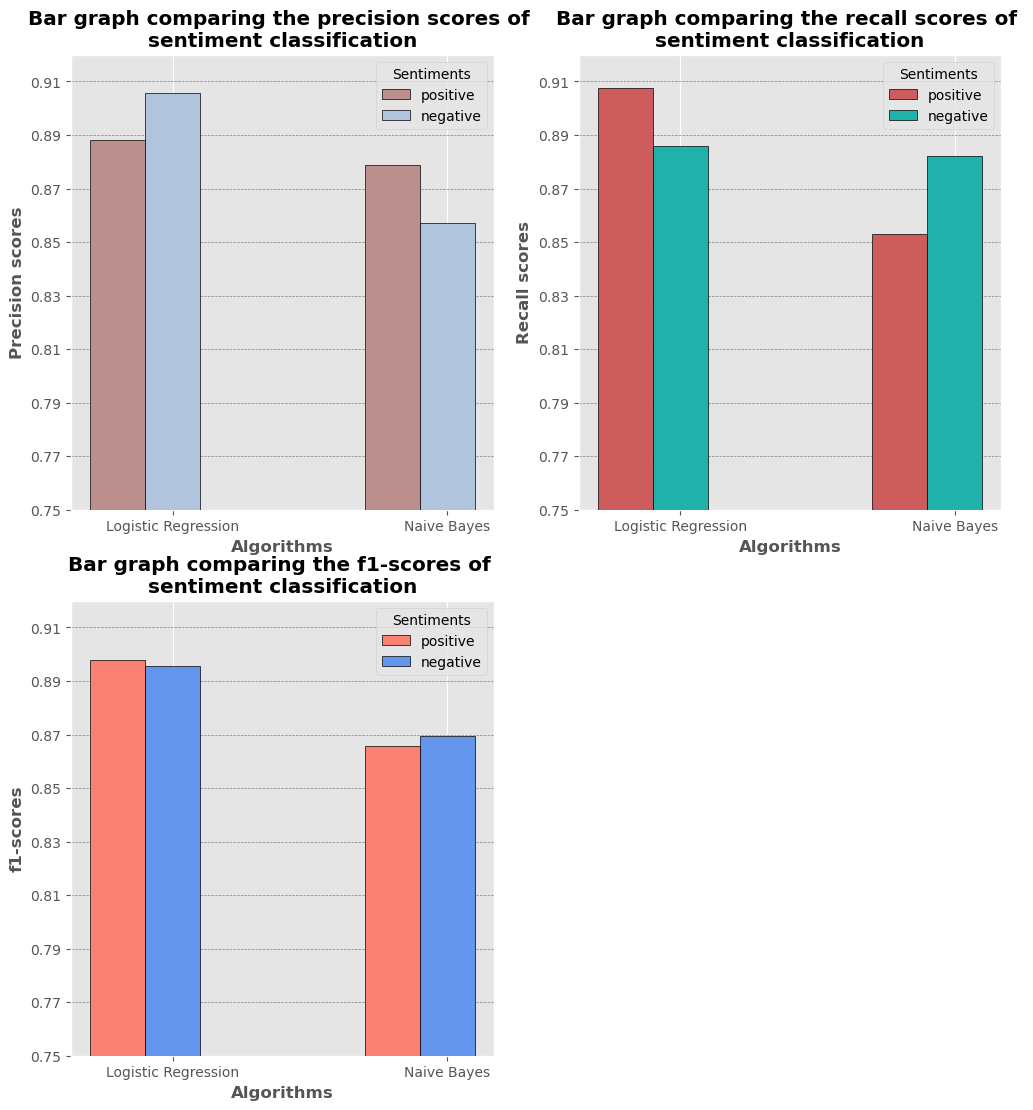

In [ ]:
# Plot Bar Graph for comparing precision, recall & f1-score

barWidth = 0.2

# Set position of bar on X axis
br1 = np.arange(len(model_names))
br2 = [x + barWidth for x in br1]  
    
fig = plt.figure(figsize =(12, 13))
    
    
#For comparing precision
plt.subplot(2, 2, 1) 

plt.ylim(0.75, 0.92)
plt.bar(br1, positive_scores["precision"], color =colors[0], edgecolor ='black', width = barWidth, label ='positive', zorder = 3)
plt.bar(br2, negative_scores["precision"], color =colors[1], edgecolor ='black', width = barWidth, label ='negative', zorder = 3)

# Adding labels and ticks
plt.xlabel("Algorithms", fontweight ='bold')
plt.ylabel("Precision scores", fontweight ='bold')
plt.title("Bar graph comparing the precision scores of \nsentiment classification", fontweight ='bold')

plt.xticks( [ r + barWidth for r in range( len(model_names) ) ], model_names )
plt.yticks( np.arange( 0.75, 0.92, 0.02 ) )

plt.legend(title='Sentiments')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5, zorder = 0, axis = 'y')



#For comparing recall
plt.subplot(2, 2, 2) 

plt.ylim(0.75, 0.92)
plt.bar(br1, positive_scores["recall"], color =colors[2], edgecolor ='black', width = barWidth, label ='positive', zorder = 3)
plt.bar(br2, negative_scores["recall"], color =colors[3], edgecolor ='black', width = barWidth, label ='negative', zorder = 3)

plt.xlabel("Algorithms", fontweight ='bold')
plt.ylabel("Recall scores", fontweight ='bold')
plt.title("Bar graph comparing the recall scores of \nsentiment classification", fontweight ='bold')

plt.xticks( [ r + barWidth for r in range( len(model_names) ) ], model_names )
plt.yticks( np.arange( 0.75, 0.92, 0.02 ) )

plt.legend(title='Sentiments')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5, zorder = 0, axis = 'y')



#For comparing f1-scores
plt.subplot(2, 2, 3) 

plt.ylim(0.75, 0.92)
plt.bar(br1, positive_scores["f1-score"], color =colors[4], edgecolor ='black', width = barWidth, label ='positive', zorder = 3)
plt.bar(br2, negative_scores["f1-score"], color =colors[5], edgecolor ='black', width = barWidth, label ='negative', zorder = 3)

plt.xlabel("Algorithms", fontweight ='bold')
plt.ylabel("f1-scores", fontweight ='bold')
plt.title("Bar graph comparing the f1-scores of \nsentiment classification", fontweight ='bold')

plt.xticks( [ r + barWidth for r in range( len(model_names) ) ], model_names )
plt.yticks( np.arange( 0.75, 0.92, 0.02 ) )

plt.legend(title='Sentiments')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5, zorder = 0, axis = 'y')


plt.show()

### **Conclusion for Question 1**
It seems **Logistic Regression (f1-score: 0.90)** performs better than **Naive Bayes (f1-score: 0.87)** Algorithm here. This can be due to the fact that the Logistic Regression algorithm does not make as many assumptions as that of the Naive Bayes algorithm. The dataset is balanced and both positive and negative sentiments are there in equal amounts so it was easier for LR to perform better for this dataset.

[0.8968886173465078, 0.8967, 0.8966877254686629, 0.8967]
[0.8679136979354076, 0.8675999999999999, 0.867571771598834, 0.8676]


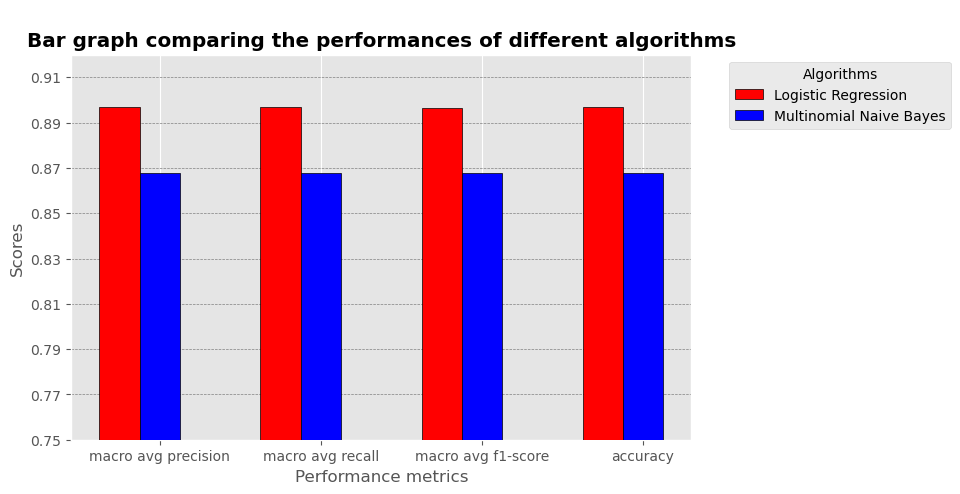

In [ ]:
#Bargraph showing 4 performance metrics for these models

barWidth = 0.25
fig = plt.subplots(figsize =(8, 5))

metrics = ['macro avg precision', 'macro avg recall', 'macro avg f1-score', 'accuracy']

lr = [lr_report['macro avg']['precision'], lr_report['macro avg']['recall'], 
      lr_report['macro avg']['f1-score'], lr_report['accuracy']]

nb = [nb_report['macro avg']['precision'], nb_report['macro avg']['recall'], 
      nb_report['macro avg']['f1-score'], nb_report['accuracy']]

print(lr)
print(nb)

# Set position of bar on X axis
br1 = np.arange(len(metrics))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.ylim(0.75, 0.92)
plt.bar(br1, lr, color = 'red', edgecolor = 'black', width = barWidth, label = 'Logistic Regression', zorder = 3)
plt.bar(br2, nb, color = 'blue', edgecolor = 'black', width = barWidth, label = 'Multinomial Naive Bayes', zorder = 3)

# Adding labels and ticks
plt.xlabel("Performance metrics")
plt.ylabel("Scores")
plt.title("\nBar graph comparing the performances of different algorithms", fontweight ='bold')

plt.xticks( [ r + barWidth for r in range( len(metrics) ) ], metrics )
plt.yticks( np.arange( 0.75, 0.92, 0.02 ) )

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Algorithms')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5, zorder = 0, axis = 'y')
plt.show()

## **Question2: Training a deep learning model (LSTM)**

### **Tokenization**

In [ ]:
#Tokenization
num_words = 3000

tokenizer = Tokenizer (num_words = num_words, lower = False)
tokenizer.fit_on_texts (x_train)

print( "\nX-train value index 3 (before tokenization): ", x_train[3] )

x_train = tokenizer.texts_to_sequences (x_train)
x_test = tokenizer.texts_to_sequences (x_test)

vocab = tokenizer.word_index
vocab_size = len( tokenizer.word_index ) + 1

print( "\n", vocab )
print( "\nThe size of Vocabulary: ", vocab_size )


# print( "\nX-train value: {}\n".format( x_train ) )
print( "\nX-train value index 3 (after tokenization): ", x_train[3] )
print( "Y-train value index 3: ", y_train[3] )



X-train value index 3 (before tokenization):  basically there family little boy jake think there zombie closet parent fighting time movie slower soap opera suddenly jake decides become rambo kill zombie ok first youre going make film must decide thriller drama drama movie watchable parent divorcing arguing like real life jake closet totally ruin film expected see boogeyman similar movie instead watched drama meaningless thriller spot 3 10 well playing parent descent dialog shot jake ignore

 {'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'time': 5, 'good': 6, 'character': 7, 'even': 8, 'story': 9, 'get': 10, 'would': 11, 'see': 12, 'make': 13, 'really': 14, 'scene': 15, 'well': 16, 'much': 17, 'people': 18, 'great': 19, 'bad': 20, 'also': 21, 'first': 22, 'way': 23, 'dont': 24, 'show': 25, 'thing': 26, 'made': 27, 'could': 28, 'think': 29, 'life': 30, 'go': 31, 'know': 32, 'watch': 33, 'love': 34, 'many': 35, 'actor': 36, 'seen': 37, 'plot': 38, 'two': 39, 'never': 40, 'say': 41, 'end':

### **Padding**

In [ ]:
#Padding the tokenized reviews
maxlen = 100

x_train = pad_sequences( x_train, padding = 'post', maxlen = maxlen )
x_test = pad_sequences( x_test, padding = 'post', maxlen = maxlen )

print( "\n[ x_train.shape[0], x_train.shape[1] ]: [ {}, {} ]\n".format ( x_train.shape[0], x_train.shape[1] ) )
print( "X-train row index 3:\n", x_train[3, :] )


[ x_train.shape[0], x_train.shape[1] ]: [ 40000, 100 ]

X-train row index 3:
 [ 702  155  117   16  381    6    9  374  287   68    8 1607  438  211
  142 1788   45 2704  240   88  116  215 2515   13    1  203    1  188
   17 2145  128    3  596    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


### **Validation Split**

In [ ]:
x_train2, x_val, y_train2, y_val = train_test_split (x_train, y_train, test_size = 0.10, random_state = 42, shuffle= True, stratify = y_train)

print ( "\nTraining Data size: x_train {}, y_train {}".format( x_train2.shape, y_train2.shape ), ' - {}%'.format( ( len(x_train2) / len(y_train) ) * 100 ) )

print ( "Validation Data size: x_val {}, y_val {}".format( x_val.shape, y_val.shape ), ' - {}%\n'.format( ( len(x_val) / len(y_train) ) * 100 ) )



Training Data size: x_train (36000, 100), y_train (36000,)  - 90.0%
Validation Data size: x_val (4000, 100), y_val (4000,)  - 10.0%



### **Word Embedding (Pretrained GloVe embedding)**

In [ ]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix


embedding_dim = 100
embedding_matrix = create_embedding_matrix( 'glove.6B.100d.txt', tokenizer.word_index, embedding_dim )

print("The embedding matrix with GLoVe embedding: \n", embedding_matrix)

The embedding matrix with GLoVe embedding: 
 [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.38251001  0.14821     0.60601002 ...  0.058921    0.091112
   0.47283   ]
 [ 0.19915999 -0.049702    0.24579    ... -0.068109    0.017651
   0.06455   ]
 ...
 [ 0.051716    0.36338001 -0.46279001 ...  0.32822001 -0.55081999
  -0.12087   ]
 [ 0.20403001 -0.50522    -0.12902001 ... -0.14824    -1.26989996
  -0.40601   ]
 [ 0.25959     0.075237    0.82380998 ... -0.64196002 -1.88370001
  -0.48177001]]


In [ ]:
#Non zero embedding vectors

nonzero_elements = np.count_nonzero( np.count_nonzero(embedding_matrix, axis=1) )
print( "Amount of nonzero embedding vectors: ", nonzero_elements / vocab_size )

Amount of nonzero embedding vectors:  0.5031960057877916


### **LSTM model building**

In [ ]:
#Our simple LSTM model with 3 layes

def lstm ():

    model = Sequential()

    model.add( layers.Embedding(vocab_size, embedding_dim, weights = [embedding_matrix], input_length = maxlen, trainable = True) )
    model.add ( layers.LSTM (64, dropout = 0.2) )
    model.add( layers.Dense(1, activation='sigmoid') )

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print( model.summary() )
    
    return model


model1 = lstm()
model2 = lstm()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          12578200  
                                                                 
 lstm_2 (LSTM)               (None, 64)                42240     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12,620,505
Trainable params: 12,620,505
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          12578200  
                                                                 
 lstm_3 (LSTM) 

###**LSTM model fitting with batch size 128**

In [ ]:
#fitting model
batch_size = 128

history1 = model1.fit( x_train2, y_train2, epochs = 50, verbose = True, 
                    validation_data = ( x_val, y_val ), batch_size = batch_size )


Epoch 1/50
282/282 [==============================] - 59s 199ms/step - loss: 0.5579 - accuracy: 0.7221 - val_loss: 0.4312 - val_accuracy: 0.8150
Epoch 2/50
282/282 [==============================] - 58s 204ms/step - loss: 0.3558 - accuracy: 0.8508 - val_loss: 0.3164 - val_accuracy: 0.8625
Epoch 3/50
282/282 [==============================] - 68s 241ms/step - loss: 0.2890 - accuracy: 0.8800 - val_loss: 0.3025 - val_accuracy: 0.8742
Epoch 4/50
282/282 [==============================] - 75s 265ms/step - loss: 0.2698 - accuracy: 0.8912 - val_loss: 0.3011 - val_accuracy: 0.8785
Epoch 5/50
282/282 [==============================] - 63s 222ms/step - loss: 0.2504 - accuracy: 0.8976 - val_loss: 0.3098 - val_accuracy: 0.8800
Epoch 6/50
282/282 [==============================] - 59s 208ms/step - loss: 0.2400 - accuracy: 0.9049 - val_loss: 0.2883 - val_accuracy: 0.8850
Epoch 7/50
282/282 [==============================] - 55s 196ms/step - loss: 0.2301 - accuracy: 0.9088 - val_loss: 0.3064 - val_ac

### **Training and Testing Loss and Accuracy (128 batch)**

In [ ]:
loss, accuracy = model1.evaluate( x_train, y_train, verbose = False )
print( "\nTraining Accuracy: {:.4f}".format(accuracy) )

loss, accuracy = model1.evaluate( x_test, y_test, verbose = False )
print( "Testing Accuracy:  {:.4f}\n".format(accuracy) )

# print(history1.history)


Training Accuracy: 0.9837
Testing Accuracy:  0.8764



###**LSTM Model Fitting with batch size 64**

In [ ]:
#for different batch size
batch_size = 64

history2 = model2.fit( x_train2, y_train2, epochs = 50, verbose = True, 
                    validation_data = ( x_val, y_val ), batch_size = batch_size )

Epoch 1/50
563/563 [==============================] - 125s 205ms/step - loss: 0.4627 - accuracy: 0.7780 - val_loss: 0.3435 - val_accuracy: 0.8537
Epoch 2/50
563/563 [==============================] - 112s 199ms/step - loss: 0.3097 - accuracy: 0.8727 - val_loss: 0.3005 - val_accuracy: 0.8712
Epoch 3/50
563/563 [==============================] - 113s 200ms/step - loss: 0.2755 - accuracy: 0.8899 - val_loss: 0.2895 - val_accuracy: 0.8830
Epoch 4/50
563/563 [==============================] - 112s 199ms/step - loss: 0.2545 - accuracy: 0.8976 - val_loss: 0.2847 - val_accuracy: 0.8840
Epoch 5/50
563/563 [==============================] - 123s 219ms/step - loss: 0.2378 - accuracy: 0.9056 - val_loss: 0.2841 - val_accuracy: 0.8867
Epoch 6/50
563/563 [==============================] - 115s 205ms/step - loss: 0.2226 - accuracy: 0.9130 - val_loss: 0.2850 - val_accuracy: 0.8882
Epoch 7/50
563/563 [==============================] - 94s 167ms/step - loss: 0.2087 - accuracy: 0.9187 - val_loss: 0.3110 - 

### **Training and Testing Loss and Accuracy (64 batch)**

In [ ]:
loss, accuracy = model2.evaluate( x_train, y_train, verbose = False )
print( "\nTraining Accuracy: {:.4f}".format(accuracy) )

loss, accuracy = model2.evaluate( x_test, y_test, verbose = False )
print( "Testing Accuracy:  {:.4f}\n".format(accuracy) )

# print(history2.history)


Training Accuracy: 0.9867
Testing Accuracy:  0.8766



### **Plotting Training and Validation accuracy and loss for comparision**

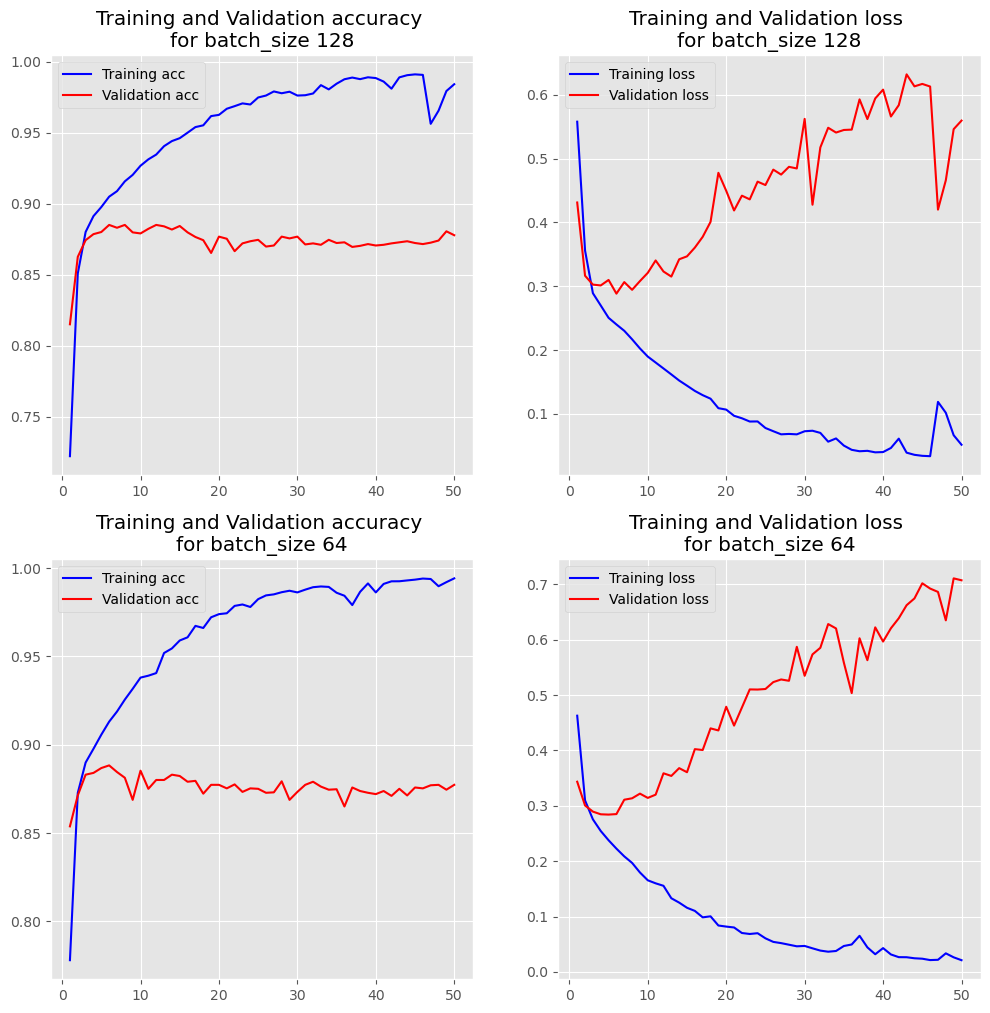

In [ ]:
#graph for Training and Validation accuracy and loss comparision

plt.style.use('ggplot')

def plot_history(history1, history2):
    
    acc = history1.history['accuracy']
    val_acc = history1.history['val_accuracy']
    loss = history1.history['loss']
    val_loss = history1.history['val_loss']
    
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 12))
    
    plt.subplot(2, 2, 1) 
    plt.plot(x, acc, 'blue', label = 'Training acc')
    plt.plot(x, val_acc, 'red', label = 'Validation acc')
    plt.title('Training and Validation accuracy \nfor batch_size 128')  
    plt.legend()
    
    plt.subplot(2, 2, 2)
    plt.plot(x, loss, 'blue', label = 'Training loss')
    plt.plot(x, val_loss, 'red', label = 'Validation loss')
    plt.title('Training and Validation loss \nfor batch_size 128')
    plt.legend()
    
    
    acc = history2.history['accuracy']
    val_acc = history2.history['val_accuracy']
    loss = history2.history['loss']
    val_loss = history2.history['val_loss']
    
    plt.subplot(2, 2, 3) 
    plt.plot(x, acc, 'blue', label = 'Training acc')
    plt.plot(x, val_acc, 'red', label = 'Validation acc')
    plt.title('Training and Validation accuracy \nfor batch_size 64')  
    plt.legend()
    
    plt.subplot(2, 2, 4)
    plt.plot(x, loss, 'blue', label = 'Training loss')
    plt.plot(x, val_loss, 'red', label = 'Validation loss')
    plt.title('Training and Validation loss \nfor batch_size 64')
    plt.legend()
    
    
plot_history(history1, history2)

### **LSTM Prediction - classification report**

In [ ]:
#Prediction

prediction = model2.predict (x_test)

# print ('\nprediction value: ', prediction)

y_pred = []

for i in prediction:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
# print ('\nlist of y PREDICTED sentiments: ', pred_labels)
# print ('\nlist of y TESTED sentiments: ', y_test)

lstm_report = accuracy_classificationrep( "LSTM", y_test, y_pred, False )

# print( lstm_report )

313/313 [==============================] - 5s 17ms/step

LSTM accuracy score : 0.8766

LSTM classification report :
              precision    recall  f1-score   support

0 (positive)       0.87      0.89      0.88      5000
1 (negative)       0.88      0.87      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000




### **LSTM Confusion matrix and Heat map**


LSTM confusion matrix :
 Predicted     0     1    All
Actual                      
0          4435   565   5000
1           669  4331   5000
All        5104  4896  10000


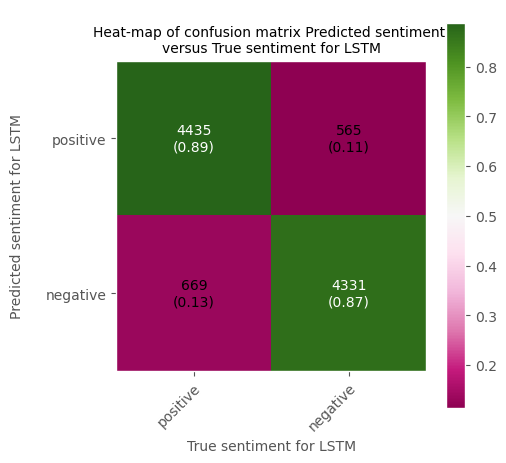

In [ ]:
#Confusion matrix for LSTM
cm_lstm = confusionMatrix("LSTM", y_test, y_pred)

#Heat-map for LSTM
plot_heat_map("LSTM", cm_lstm, plt.cm.PiYG)

### **Bar graphs comparing LR, NB and LSTM**

In [ ]:
# bar graph function (3 models)
def plot_bar(model_names, positive_scores, negative_scores, colors, metric):

    barWidth = 0.25
    fig = plt.subplots(figsize =(5, 5))

    # Set position of bar on X axis
    br1 = np.arange(len(model_names))
    br2 = [x + barWidth for x in br1]

    # Make the plot
    plt.ylim(0.75, 0.92)
    plt.bar(br1, positive_scores, color =colors[0], edgecolor ='black', width = barWidth, label ='positive', zorder = 3)
    plt.bar(br2, negative_scores, color =colors[1], edgecolor ='black', width = barWidth, label ='negative', zorder = 3)

    # Adding labels and ticks
    plt.xlabel("Algorithms")
    plt.ylabel(metric)
    plt.title("Bar graph comparing the {} of sentiment classification".format(metric), fontweight ='bold')

    plt.xticks( [ r + barWidth for r in range( len(model_names) ) ], model_names )
    plt.yticks( np.arange( 0.75, 0.92, 0.02 ) )

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Sentiments')
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5, zorder = 0, axis = 'y')
    plt.show()

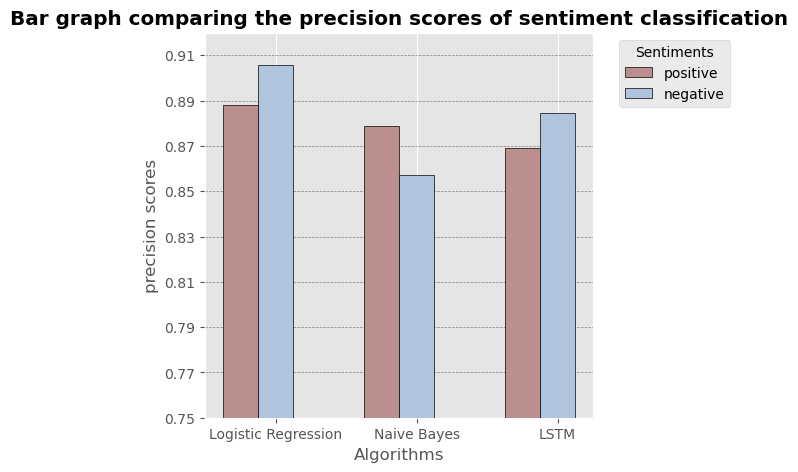

In [ ]:
model_names = ['Logistic Regression', 'Naive Bayes', 'LSTM']

positive_metrics = {
                    'f1-score': [ lr_report['0']['f1-score'], nb_report['0']['f1-score'], lstm_report['0']['f1-score'] ], 
                    'precision': [ lr_report['0']['precision'], nb_report['0']['precision'], lstm_report['0']['precision'] ],
                    'recall': [ lr_report['0']['recall'], nb_report['0']['recall'], lstm_report['0']['recall'] ]
                    }
negative_metrics = {
                    'f1-score': [ lr_report['1']['f1-score'], nb_report['1']['f1-score'], lstm_report['1']['f1-score'] ], 
                    'precision': [ lr_report['1']['precision'], nb_report['1']['precision'], lstm_report['1']['precision'] ],
                    'recall': [ lr_report['1']['recall'], nb_report['1']['recall'], lstm_report['1']['recall'] ]
                    }

#For comparing precision
plot_bar( model_names, positive_metrics["precision"], negative_metrics["precision"], 
         ['rosybrown', 'lightsteelblue'], 'precision scores' )

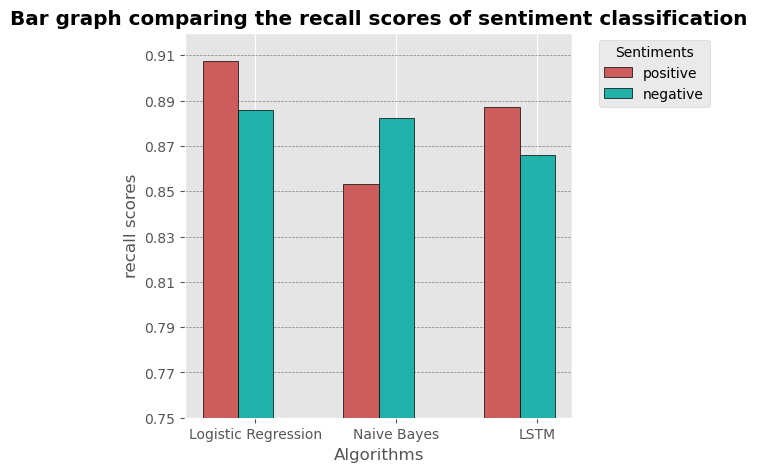

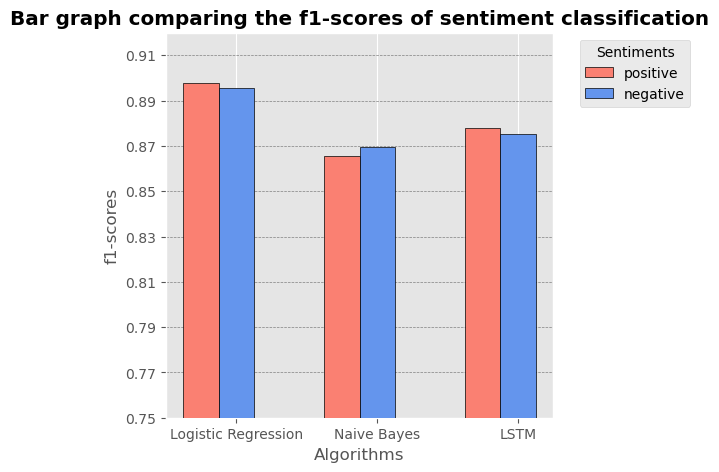

In [ ]:
#For comparing recall
plot_bar( model_names, positive_metrics["recall"], negative_metrics["recall"], 
         ['indianred', 'lightseagreen'], 'recall scores' )

#For comparing f1-scores
plot_bar( model_names, positive_metrics["f1-score"], negative_metrics["f1-score"], 
         ['salmon', 'cornflowerblue'], 'f1-scores' )

[0.8968886173465078, 0.8967, 0.8966877254686629, 0.8967]
[0.8679136979354076, 0.8675999999999999, 0.867571771598834, 0.8676]
[0.8767630027455078, 0.8766, 0.8765866516122383, 0.8766]


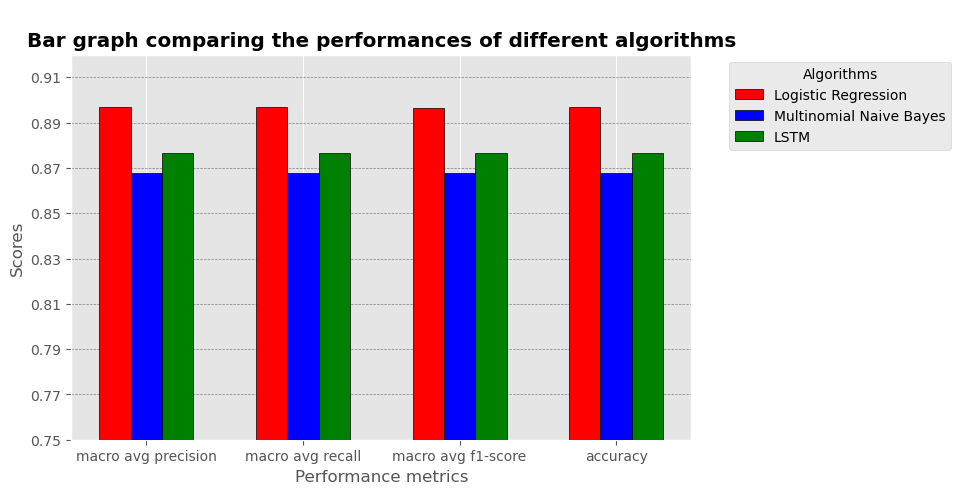

In [ ]:
barWidth = 0.2
fig = plt.subplots(figsize =(8, 5))

metrics = ['macro avg precision', 'macro avg recall', 'macro avg f1-score', 'accuracy']

lr = [lr_report['macro avg']['precision'], lr_report['macro avg']['recall'], 
      lr_report['macro avg']['f1-score'], lr_report['accuracy']]

nb = [nb_report['macro avg']['precision'], nb_report['macro avg']['recall'], 
      nb_report['macro avg']['f1-score'], nb_report['accuracy']]

lstm = [lstm_report['macro avg']['precision'], lstm_report['macro avg']['recall'], 
        lstm_report['macro avg']['f1-score'], lstm_report['accuracy']]

print(lr)
print(nb)
print(lstm)

# Set position of bar on X axis
br1 = np.arange(len(metrics))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.ylim(0.75, 0.92)
plt.bar(br1, lr, color = 'red', edgecolor = 'black', width = barWidth, label = 'Logistic Regression', zorder = 3)
plt.bar(br2, nb, color = 'blue', edgecolor = 'black', width = barWidth, label = 'Multinomial Naive Bayes', zorder = 3)
plt.bar(br3, lstm, color = 'green', edgecolor = 'black', width = barWidth, label = 'LSTM', zorder = 3)

# Adding labels and ticks
plt.xlabel("Performance metrics")
plt.ylabel("Scores")
plt.title("\nBar graph comparing the performances of different algorithms", fontweight ='bold')

plt.xticks( [ r + barWidth for r in range( len(metrics) ) ], metrics )
plt.yticks( np.arange( 0.75, 0.92, 0.02 ) )

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Algorithms')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5, zorder = 0, axis = 'y')
plt.show()

### **Conclusion for Question 2**
It seems **Logistic Regression performed best** compared to the other two models. **LSTM (f1-score: 0.88) came in second**. Although LSTM has non-linear more complex decision boundary compared to LR, **we see an overfitting problem** here which caused it to perform worse in this case. Also it is a simple LSTM structure with only 3 layers and 64 units so this might have caused the issue. Extensive hyperparameter tuning may solve this problem. Lastly we see **Naive Bayes performing the worst**.  